In [74]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import math

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
#from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 8)

In [3]:
df_domclick = pd.read_csv("domclick/Москва_domclick_dataset.csv", sep = ";")
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3209 entries, 0 to 3208
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3209 non-null   int64  
 1   region                         3209 non-null   object 
 2   address                        3209 non-null   object 
 3   latitude                       3209 non-null   float64
 4   longitude                      3209 non-null   float64
 5   price                          3209 non-null   object 
 6   house_floors                   3209 non-null   int64  
 7   house_buildYear                3209 non-null   object 
 8   house_ceilingHeight            3209 non-null   object 
 9   house_hasGarbageDisposer       2420 non-null   object 
 10  house_liftsFreight             2189 non-null   float64
 11  house_liftsPassenger           2572 non-null   float64
 12  house_wallType                 3143 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1912507562,Москва,"1-й Красногвардейский проезд, 15",55.750479,37.539527,68000000,75,2018,3.2,True,NaN,1.0,Монолитный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,0.0,108.0,15.0,80.0,50,2,undefined,0,NaN,Дизайнерский,NaN
1,1912507510,Москва,"Долгоруковская улица, 25к1",55.776305,37.601322,30500000,6,0,undefined,NaN,NaN,NaN,NaN,39.2,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2.0,39.2,8.0,15.0,2,1,undefined,0,NaN,Требует ремонта,NaN
2,1838388808,Москва,"1-й Смоленский переулок, 21",55.749334,37.579178,104900000,7,2015,undefined,True,1.0,1.0,NaN,110.5,NaN,60,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,4.0,110.0,20.0,0.0,5,3,undefined,1,NaN,Требует ремонта,NaN
3,1840286654,Москва,"улица Большая Полянка, 9",55.740294,37.617330,205875000,6,2021,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Центральное,5,A,5,Автоматическая,NaN,NaN,NaN,NaN,NaN,Центральное,Приточно-вытяжная,Свободная продажа,3.0,152.5,19.0,0.0,3,1,undefined,0,NaN,Дизайнерский,NaN
4,1885733273,Москва,"Мосфильмовская улица, 1Б",55.718010,37.525136,295544000,12,2021,undefined,NaN,NaN,1.0,Монолитный,NaN,NaN,15605.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,5.0,191.0,20.0,0.0,8,1,undefined,1,NaN,Требует ремонта,NaN


In [4]:
df_domclick.drop_duplicates(keep = 'last', inplace = True)
df_domclick.replace('undefined', np.nan, inplace=True)
df_domclick['objectInfo_kitchenArea'].replace(0, np.nan, inplace=True)
df_domclick['objectInfo_livingArea'].replace(0, np.nan, inplace=True)

In [7]:
df_domclick.info()
df_domclick.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 0 to 3208
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3209 non-null   int64  
 1   region                         3209 non-null   object 
 2   address                        3209 non-null   object 
 3   latitude                       3209 non-null   float64
 4   longitude                      3209 non-null   float64
 5   price                          3208 non-null   object 
 6   house_floors                   3209 non-null   int64  
 7   house_buildYear                3188 non-null   object 
 8   house_ceilingHeight            1807 non-null   object 
 9   house_hasGarbageDisposer       2420 non-null   object 
 10  house_liftsFreight             2189 non-null   float64
 11  house_liftsPassenger           2572 non-null   float64
 12  house_wallType                 3132 non-null   o

,id,region,address,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaCommonPropery,house_areaNonResidential,house_areaResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,saleType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation,objectInfo_loggias
0,1912507562,Москва,"1-й Красногвардейский проезд, 15",55.750479,37.539527,68000000,75,2018,3.2,True,NaN,1.0,Монолитный,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,0.0,108.0,15.0,80.0,50,2,NaN,0,NaN,Дизайнерский,NaN
1,1912507510,Москва,"Долгоруковская улица, 25к1",55.776305,37.601322,30500000,6,0,NaN,NaN,NaN,NaN,NaN,39.2,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,2.0,39.2,8.0,15.0,2,1,NaN,0,NaN,Требует ремонта,NaN
2,1838388808,Москва,"1-й Смоленский переулок, 21",55.749334,37.579178,104900000,7,2015,NaN,True,1.0,1.0,NaN,110.5,NaN,60,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,4.0,110.0,20.0,NaN,5,3,NaN,1,NaN,Требует ремонта,NaN
3,1840286654,Москва,"улица Большая Полянка, 9",55.740294,37.617330,205875000,6,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Центральное,5,A,5,Автоматическая,NaN,NaN,NaN,NaN,NaN,Центральное,Приточно-вытяжная,Свободная продажа,3.0,152.5,19.0,NaN,3,1,NaN,0,NaN,Дизайнерский,NaN
4,1885733273,Москва,"Мосфильмовская улица, 1Б",55.718010,37.525136,295544000,12,2021,NaN,NaN,NaN,1.0,Монолитный,NaN,NaN,15605.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Железобетонный,NaN,NaN,NaN,NaN,NaN,NaN,Свободная продажа,5.0,191.0,20.0,NaN,8,1,NaN,1,NaN,Требует ремонта,NaN


In [49]:
df_domclick_prepared = df_domclick.drop(columns = ['id', 'region', 'address', 'house_areaCommonPropery', 'house_areaResidential', 'objectInfo_loggias', 'saleType'])

cat_cols = ['house_hasGarbageDisposer', 'house_wallType', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
           'house_fireFightingType', 'house_floorType', 'house_foundationType', 'house_heatingType', 'house_sewerageType',
           'house_ventilationType', 'objectInfo_renovation', 'objectInfo_hasGas']



df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3208 non-null   object 
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3188 non-null   object 
 5   house_ceilingHeight            1807 non-null   object 
 6   house_hasGarbageDisposer       2420 non-null   object 
 7   house_liftsFreight             2189 non-null   float64
 8   house_liftsPassenger           2572 non-null   float64
 9   house_wallType                 3132 non-null   object 
 10  house_areaNonResidential       2016 non-null   object 
 11  house_basementArea             1999 non-null   object 
 12  house_chuteCount               1602 non-null   o

In [50]:
mappc_d = {}
ord_enc = OrdinalEncoder()

df_domclick_prepared[cat_cols] = ord_enc.fit_transform(df_domclick_prepared[cat_cols])
df_domclick_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3208 non-null   object 
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3188 non-null   object 
 5   house_ceilingHeight            1807 non-null   object 
 6   house_hasGarbageDisposer       2420 non-null   float64
 7   house_liftsFreight             2189 non-null   float64
 8   house_liftsPassenger           2572 non-null   float64
 9   house_wallType                 3132 non-null   float64
 10  house_areaNonResidential       2016 non-null   object 
 11  house_basementArea             1999 non-null   object 
 12  house_chuteCount               1602 non-null   o

In [52]:
non_num_cols = ['price', 'house_buildYear', 'house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount', 'house_parkingSquare', 'house_sewerageCesspoolsVolume',
               'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms']

for col in non_num_cols:
    df_domclick_prepared[col] = pd.to_numeric(df_domclick_prepared[col].astype(str).str.strip(), errors = 'coerce')

In [61]:
to_int_cols = ['price', 'house_buildYear', 'house_chuteCount',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount',
               'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms']

for col in to_int_cols:
    #df_domclick_prepared[col] = df_domclick_prepared[col].astype(str).str.strip().astype(int)
    mice_imputation[col] = mice_imputation[col].astype('int64')

to_float_cols = ['house_ceilingHeight', 'house_areaNonResidential', 'house_basementArea',
                 'house_parkingSquare', 'house_sewerageCesspoolsVolume']

for col in to_float_cols:
    df_domclick_prepared[col] = df_domclick_prepared[col].astype(str).str.strip().astype(float)

In [53]:
df_domclick_prepared.info()
df_domclick_prepared.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3208 non-null   float64
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3188 non-null   float64
 5   house_ceilingHeight            1807 non-null   float64
 6   house_hasGarbageDisposer       2420 non-null   float64
 7   house_liftsFreight             2189 non-null   float64
 8   house_liftsPassenger           2572 non-null   float64
 9   house_wallType                 3132 non-null   float64
 10  house_areaNonResidential       2016 non-null   float64
 11  house_basementArea             1999 non-null   float64
 12  house_chuteCount               1602 non-null   f

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,55.750479,37.539527,68000000.0,75,2018.0,3.2,1.0,NaN,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,108.0,15.0,80.0,50,2.0,NaN,0,NaN,3.0
1,55.776305,37.601322,30500000.0,6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,39.2,8.0,15.0,2,1.0,NaN,0,NaN,8.0
2,55.749334,37.579178,104900000.0,7,2015.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,110.0,20.0,NaN,5,3.0,NaN,1,NaN,8.0
3,55.740294,37.617330,205875000.0,6,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,5.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,152.5,19.0,NaN,3,1.0,NaN,0,NaN,3.0
4,55.718010,37.525136,295544000.0,12,2021.0,NaN,NaN,NaN,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,191.0,20.0,NaN,8,1.0,NaN,1,NaN,8.0


In [54]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(data = df_domclick_prepared, save_all_iterations = True, random_state = 123)

In [69]:
mice_kernel.mice(10)
mice_imputation = mice_kernel.complete_data()

In [70]:
to_int_cols = ['price', 'house_buildYear', 'house_chuteCount', 'house_hasGarbageDisposer', 'house_liftsFreight', 
               'house_liftsPassenger', 'house_wallType', 'house_coldWaterType', 'house_electricalType', 'house_energyEfficiency',
               'house_fireFightingType', 'house_floorType', 'house_foundationType', 'house_heatingType', 'house_sewerageType',
               'house_ventilationType', 'objectInfo_rooms', 'objectInfo_hasGas', 'objectInfo_renovation',
               'house_electricalEntriesCount', 'house_elevatorsCount', 'house_entranceCount',
               'objectInfo_connectedBathrooms', 'objectInfo_separatedBathrooms']

for col in to_int_cols:
    #df_domclick_prepared[col] = df_domclick_prepared[col].astype(str).str.strip().astype(int)
    mice_imputation[col] = mice_imputation[col].astype('int64')

In [71]:
mice_imputation.info()
mice_imputation.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3209 entries, 0 to 3208
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       3209 non-null   float64
 1   longitude                      3209 non-null   float64
 2   price                          3209 non-null   int64  
 3   house_floors                   3209 non-null   int64  
 4   house_buildYear                3209 non-null   int64  
 5   house_ceilingHeight            3209 non-null   float64
 6   house_hasGarbageDisposer       3209 non-null   int64  
 7   house_liftsFreight             3209 non-null   int64  
 8   house_liftsPassenger           3209 non-null   int64  
 9   house_wallType                 3209 non-null   int64  
 10  house_areaNonResidential       3209 non-null   float64
 11  house_basementArea             3209 non-null   float64
 12  house_chuteCount               3209 non-null   i

,latitude,longitude,price,house_floors,house_buildYear,house_ceilingHeight,house_hasGarbageDisposer,house_liftsFreight,house_liftsPassenger,house_wallType,house_areaNonResidential,house_basementArea,house_chuteCount,house_coldWaterType,house_electricalEntriesCount,house_electricalType,house_elevatorsCount,house_energyEfficiency,house_entranceCount,house_fireFightingType,house_floorType,house_foundationType,house_heatingType,house_parkingSquare,house_sewerageCesspoolsVolume,house_sewerageType,house_ventilationType,objectInfo_rooms,objectInfo_area,objectInfo_kitchenArea,objectInfo_livingArea,objectInfo_floor,objectInfo_connectedBathrooms,objectInfo_separatedBathrooms,objectInfo_balconies,objectInfo_hasGas,objectInfo_renovation
0,55.750479,37.539527,68000000,75,2018,3.2,1,2,1,8,37480.6,21657.7,3,1,44,1,6,2,3,0,2,6,3,23306.0,0.0,1,0,0,108.0,15.0,80.0,50,2,2,0,0,3
1,55.776305,37.601322,30500000,6,0,3.5,1,1,1,6,1413.0,537.0,5,1,1,1,2,10,2,1,1,3,3,0.0,0.0,1,2,2,39.2,8.0,15.0,2,1,1,0,0,8
2,55.749334,37.579178,104900000,7,2015,3.3,1,1,1,8,3076.0,874.0,2,1,3,1,2,8,1,0,2,1,3,0.0,0.0,1,2,4,110.0,20.0,73.7,5,3,2,1,0,8
3,55.740294,37.617330,205875000,6,2021,3.6,0,0,1,8,0.0,3439.0,9,1,2,1,5,0,5,0,2,3,1,0.0,0.0,1,2,3,152.5,19.0,117.5,3,1,0,0,0,3
4,55.718010,37.525136,295544000,12,2021,3.3,0,1,1,8,5878.1,2609.2,7,1,0,1,2,3,2,1,2,5,1,991.0,0.0,1,0,5,191.0,20.0,150.0,8,1,1,1,0,8


<Axes: xlabel='house_floorType', ylabel='count'>

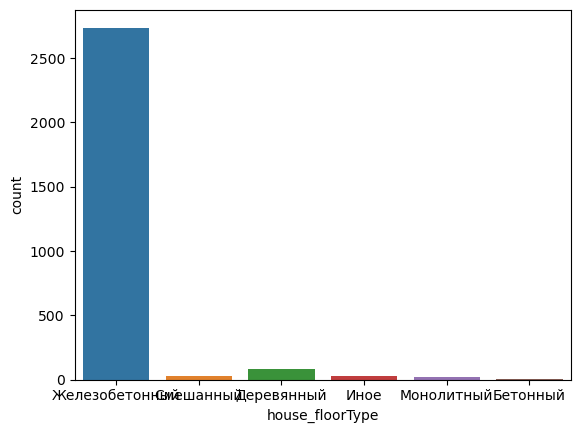

In [72]:
sns.countplot(data=df_domclick, x='house_floorType')

<Axes: xlabel='house_floorType', ylabel='count'>

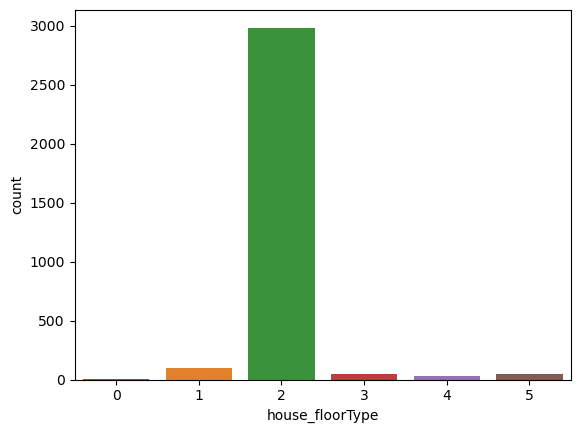

In [73]:
sns.countplot(data=mice_imputation, x='house_floorType')

<Axes: xlabel='house_hasGarbageDisposer', ylabel='count'>

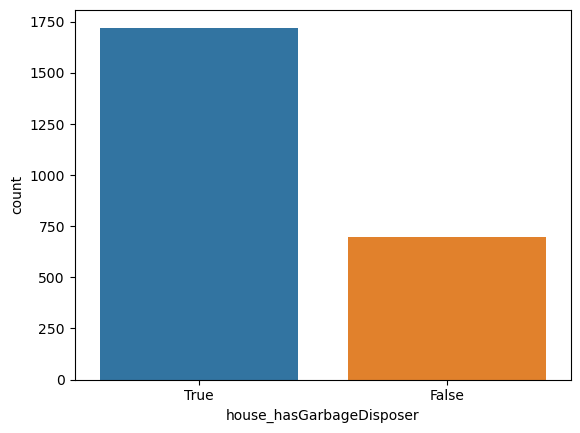

In [75]:
sns.countplot(data=df_domclick, x='house_hasGarbageDisposer')

<Axes: xlabel='house_hasGarbageDisposer', ylabel='count'>

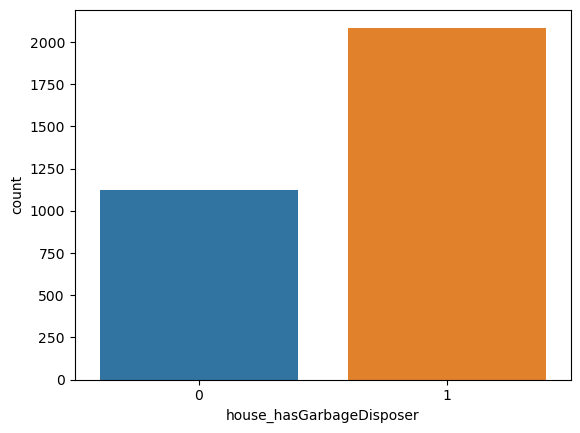

In [76]:
sns.countplot(data=mice_imputation, x='house_hasGarbageDisposer')